Nama    : Richard Edgina Virgo  
Batch   : 006

---

I, Richard Edgina Virgo, currently work as a data scientist at BCAS Bank. My supervisor assigned me the task of labeling and clustering data based on credit card consumer behavior and activity. The labels are used for prediction and analysis to identify patterns, which will then be utilized for making future predictions. In order to understanding goals more clearly, the SMART method will be used, namely make machine learning model for clustering and labelling based on the data given by the Bank, Using silhouette score and Elbow method to analyze the how good the model for measuring cluster quality , using PCA to overcome feature redundancy in data set and using K-means as algorithm to cluster the data , successfully cluster the data, label, and analysis before Saturday at 23:59.

---
---

### ***SQL Query***

---

```sql
SELECT * 
FROM `ftds-hacktiv8-project.phase1_ftds_006_bsd.credit-card-information`
WHERE MOD(CUST_ID, 2) = 0
```

---

First things to do is Import Libraries

### ***Import Libraries***

----

In [1]:
# Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #turn off warning

from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA
# Import KMeans for clustering
from sklearn.cluster import KMeans
# Function to create Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.linear_model import LogisticRegression
import phik
import json
import pickle

---
---

<vspace>

### ***Data Loading***

----

Let's Load the Data

In [2]:
# Show the data frame
df = pd.read_csv('P1G6_Set_1_Richard_Edgina.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


Here top 10 data

In [3]:
# Show top 10 data
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875000,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125000,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
5,4266,2237.238086,1.000000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8
6,4360,2730.843802,1.000000,2900.0,2900.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2900.0,0.000000,NaN,0.0,8
7,4680,424.994385,0.375000,1200.0,1200.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1200.0,57.266292,56.720210,0.0,8
8,5884,18.885677,0.375000,57.0,57.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
9,24,0.004816,0.545455,51.7,0.0,51.7,0.0,0.250,0.000,0.250,0.0,0,3,3000.0,33.249088,0.059481,0.0,12


In [4]:
# Show 10 bottom data
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,1588,538.768762,0.909091,226.95,129.58,97.37,452.009130,0.545455,0.090909,0.454545,0.272727,8,9,1200.0,946.649324,211.220001,0.000000,11
4466,6900,7468.012010,1.000000,1569.41,796.07,773.34,4500.288676,0.545455,0.454545,0.363636,0.272727,7,10,8700.0,2162.943350,4628.802111,0.000000,11
4467,2528,427.642111,0.888889,0.00,0.00,0.00,2563.705644,0.000000,0.000000,0.000000,0.888889,62,0,1200.0,2853.967334,146.976542,0.500000,9
4468,1226,706.327578,0.888889,169.54,169.54,0.00,1406.735573,0.333333,0.333333,0.000000,0.888889,14,3,2500.0,302.976780,142.597254,0.000000,9
4469,2152,1420.727073,1.000000,0.00,0.00,0.00,311.804499,0.000000,0.000000,0.000000,0.900000,9,0,1500.0,506.765033,449.179818,0.000000,10
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


Now that we have examined the data, I assume that CUST ID is not important to the dataset because the ID itself does not hold any intrinsic value for analysis.

In [5]:
# Drop Customer Id from the data
df = df.drop('CUST_ID', axis=1)

Next I want to see the number of duplicate data

In [6]:
# See the numbers of duplicated data
df.duplicated().sum()
# Drop duplicated data
df.drop_duplicates()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


Because there is no duplicated data, so there is a row data that need to be drop

Next i want to change 'Balance' Column name due to misrepresent name. It should be called 'Balance Left'

In [7]:
# Change BALANCE column name to BALANCE LEFT
df = df.rename(columns = {'BALANCE':'BALANCE LEFT'})

In the next section, Exploratory Data Analysis (EDA)

---
---

<vspace>

### ***EDA Before Clustering***

----

In [8]:
df_eda = df.copy()

Now, i really curious about the data, so i will explore more about it

i will drop Missing value Data, because it doesn't contain information needed for EDA.  

In [9]:
# Check Missing Value data 
df_eda.isnull().sum().sum()

159

Because missing value data is not much so i will drop it

In [10]:
df_eda = df_eda.dropna()

### ***1. Balance Left with Purchase Transaction***

First, i will make a new column that show balance left based on limit, and then i will categorize balance left into 3 category based on limit, first "Low Balance Left", second "Moderate Balance Left", and third "High Balance Left"

In [11]:
# Make a new column that show percentage balance left
df_eda['Balance_Left_Frequency'] = ((df_eda['BALANCE LEFT']/df_eda['CREDIT_LIMIT']))

In [12]:
# Create container
Container = []
# Loop for i in data frame with column 'Balance_Left_Frequency'
for i in df_eda['Balance_Left_Frequency']:
    # Condition for classification balance left
    if 0 <= i <= 0.25:
        Container.append('Low Balance Left')
    elif 0.25< i <= 0.75:
        Container.append('Moderate Balance Left')
    elif i > 0.75:
        Container.append('High Balance Left')
# Make new column
df_eda['Balance Left Group'] = Container

Next, I will group by Balance Left Group and calculate the average the purchase transaction.

In [13]:
# Group by age group and default payment status for the next month
BalanceLeftGroup = df_eda.groupby('Balance Left Group')['PURCHASES_TRX'].mean()

Now let's visualize it

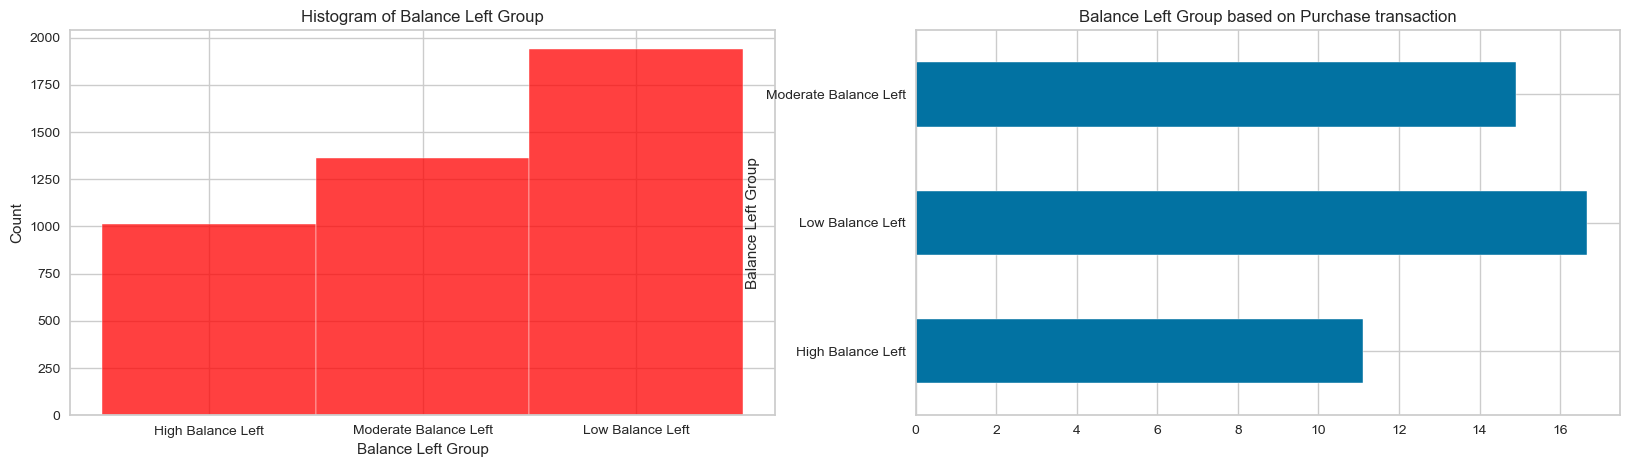

In [14]:
# Creating subplots with 1 row and 2 columns, not sharing the x-axis, and setting the figure size
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.histplot(df_eda['Balance Left Group'], kde = False, color ='red', bins = 30)
plt.title('Histogram of Balance Left Group')
plt.subplot(1,2,2)
BalanceLeftGroup.plot(kind = 'barh')
plt.title('Balance Left Group based on Purchase transaction')
# Show plot
plt.show()

From histogram on the left, it show, the most balance left group is Low balance, followed by Moderate and last High balance left. Horizontal histogram on the right, it show low balance left show average purchase transaction is 17, followed by moderate balance left is 15, and finally high balance left show average purchase transaction is 11. From that information, Number of purchase transaction have correlation to balance left group. The more frequentluy purchase transaction are made, the less balance left that you have.

### ***2. Minimum Payment based on LIMIT and Balance Left***

In [15]:
# Create container
Container = []
# Loop for i in data frame with column 'Minimum payments'
for i in df_eda['MINIMUM_PAYMENTS']:
    # Condition for classification balance left
    if 0 <= i <= 200:
        Container.append('Low Minimum Payments')
    elif 200 < i <= 1000:
        Container.append('Moderate Minimum Payments')
    elif 1000 < i < 10000:
        Container.append('High Minimum Payments')
    elif i >= 10000:
        Container.append('Extremely High Minimum Payments')
# Make new column
df_eda['Minimum Payments Group'] = Container

Next, I will group by Minimum Payment Group Group and calculate the average the limit.

In [16]:
# Group by age group and default payment status for the next month
MinimumPaymentsGroup = df_eda.groupby('Minimum Payments Group')['CREDIT_LIMIT'].mean()

Now let's visualize it

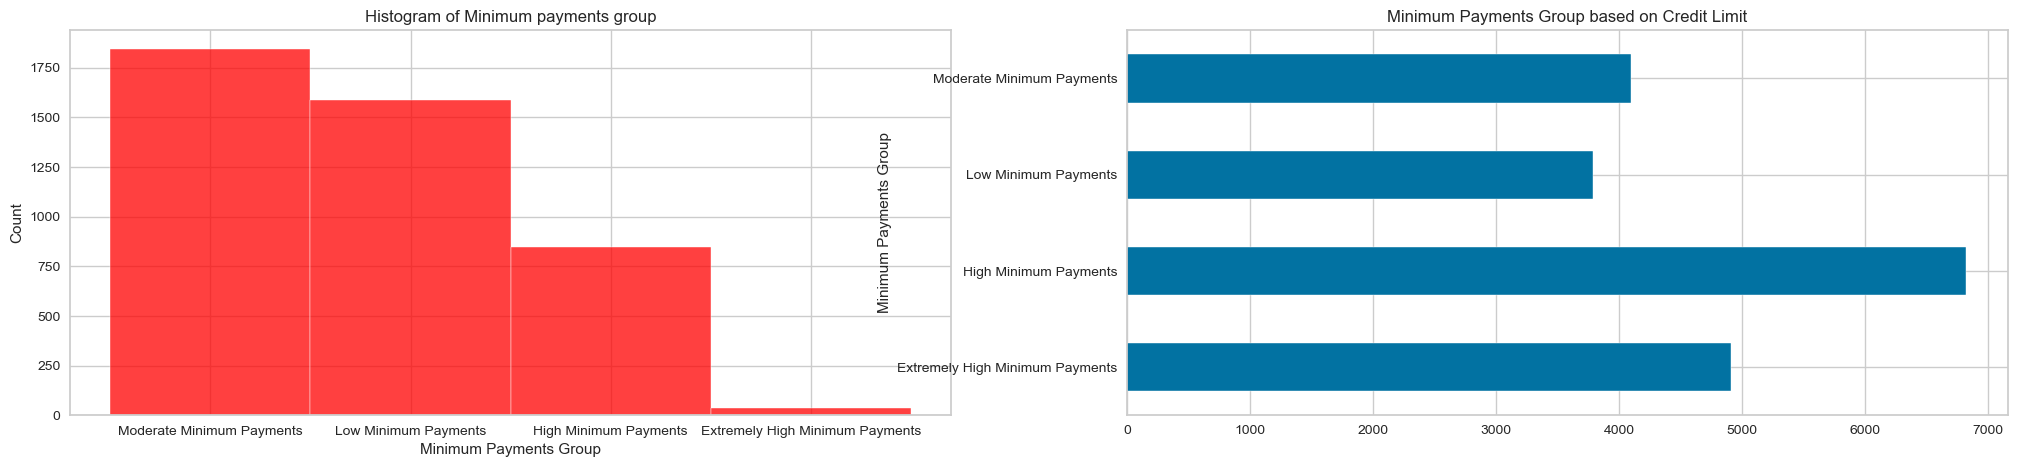

In [17]:
# Creating subplots with 1 row and 2 columns, not sharing the x-axis, and setting the figure size
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.histplot(df_eda['Minimum Payments Group'], kde = False, color ='red', bins = 30)
plt.title('Histogram of Minimum payments group')
plt.subplot(1,2,2)
MinimumPaymentsGroup.plot(kind = 'barh')
plt.title('Minimum Payments Group based on Credit Limit')
# Show plot
plt.show()

From histogram on the left, it show, the most minimum payment is moderate, followed by low, high and finally extremely high. Horizontal histogram on the right, it show high minimum payments is around 6800, followed by extremely high minimum payments, moderate minimum payments, and finally Low minimum payments. It indicates that credit limit does'nt really have linear correlation to minimum payment. it because extremely high minimum payment have lower credit limit compare to high minimum payments

### ***3. Balance Group based on Minimum Payment***

Next i want to make a new column which display balance, which is a total amount of money currently owed by a cardholder to their credit card company. 

In [18]:
# Make a new column that show balance 
df_eda['Balance'] = df_eda['CREDIT_LIMIT'] - df_eda['BALANCE LEFT']

Next i want to group it into 3 categories

In [19]:
# Create container
Container = []
# Loop for i in data frame with column 'Balance'
for i in df_eda['Balance']:
    # Condition for classification balance left
    if i < 0.0:
        Container.append('Bank Owe You')
    elif i == 0.0:
        Container.append('Zero Balance')
    else :
        Container.append('You Have Balance')
# Make new column
df_eda['Balance Group'] = Container

Let's visualize it to see distribution

Text(0.5, 1.0, 'Histogram of Balance Group')

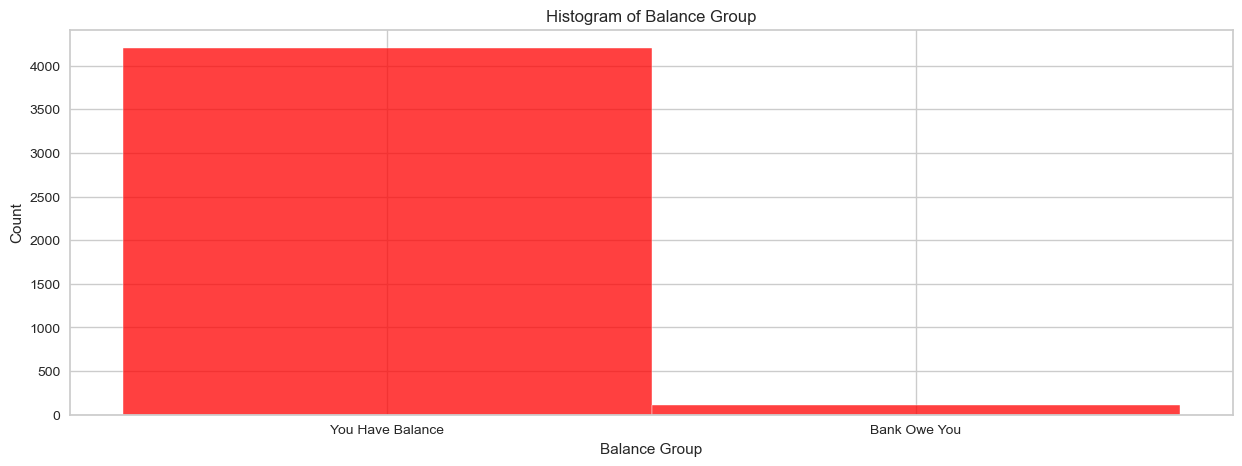

In [20]:
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.histplot(df_eda['Balance Group'], kde = False, color ='red', bins = 30)
plt.title('Histogram of Balance Group')

The histogram indicates that the "You Have Balance" group has the highest frequency, while the "Bank Owe You" group has a significantly lower frequency in comparison. This suggests a substantial difference between the two groups.

Next, I will make a new column that categorized limit into 3 category based on limit, first "Low Limit", second "Moderate Limit", and third "High Limit"

In [21]:
df_eda['CREDIT_LIMIT'].describe()

count     4316.000000
mean      4524.431479
std       3688.856008
min        150.000000
25%       1500.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

In [22]:
# Create container
Container = []
# Loop for i in data frame with column 'Percentage_Balance_Left'
for i in df_eda['CREDIT_LIMIT']:
    # Condition for classification balance left
    if 50 < i <= 1000:
        Container.append('Low Limit')
    elif 1000 < i <= 7000:
        Container.append('Moderate Limit')
    elif i > 7000:
        Container.append('High Limit')
# Make new column
df_eda['Limit Group'] = Container

Let's visualize it to see distribution

Text(0.5, 1.0, 'Histogram of Limit Group')

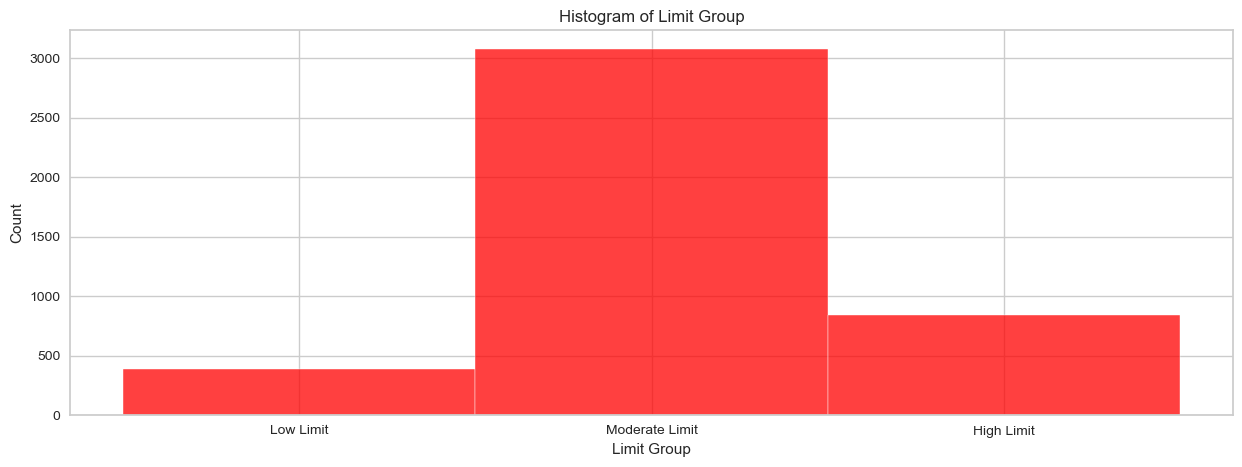

In [23]:
plt.figure(figsize=(15,5))
sns.set_style('whitegrid')
sns.histplot(df_eda['Limit Group'], kde = False, color ='red', bins = 30)
plt.title('Histogram of Limit Group')

Histogram above tell us that Limit Group 'Moderate Limit' have the most, followed by 'High Limit' and finally 'Low Limit'. It can be conlude that majority of the group is Moderate Limit.

Next i want to see the belance group based on limit group and minimum payments group

In [24]:
# Group by
BalanceGroup = df_eda.groupby(['Limit Group','Minimum Payments Group'])['Balance Group'].agg(pd.Series.mode)

In [25]:
BalanceGroup

Limit Group     Minimum Payments Group         
High Limit      Extremely High Minimum Payments                    You Have Balance
                High Minimum Payments                              You Have Balance
                Low Minimum Payments                               You Have Balance
                Moderate Minimum Payments                          You Have Balance
Low Limit       Extremely High Minimum Payments    [Bank Owe You, You Have Balance]
                High Minimum Payments                              You Have Balance
                Low Minimum Payments                               You Have Balance
                Moderate Minimum Payments                          You Have Balance
Moderate Limit  Extremely High Minimum Payments                        Bank Owe You
                High Minimum Payments                              You Have Balance
                Low Minimum Payments                               You Have Balance
                Moderate Min

The group-by analysis shows that within the "Low Limit" and "Moderate Limit" groups, the "Extremely High" minimum payment category has the highest balance group of "Bank Owe You." This indicates that minimum payments contribute to the balance group distribution, with extremely high minimum payments correlating to the "Bank Owe You" distribution.

Next, proceed to Feature Engineering

---
---

<vspace>

### ***Feature Engineering***

----

Now, let's Check Missing Value

### ***Missing Value Handling***

Check missing value in data frame 

In [26]:
# Check Missing Value 
df.isnull().sum()

BALANCE LEFT                          0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

From data, Credit Limit has 1 missing value and Minimum payments has 158 missing value. I assume the missing data is missing completely at random and missing data is less than 95 % as results the data will drop

In [27]:
# Drop data frame and reset index
df = df.dropna().reset_index(drop=True)

In [ ]:
df

For clustering analysis purposes, i will make a new data frame the same as original data frame, which will be used to a new column cluster

In [93]:
df_cluster = df.copy()

Next Outlier Handling

---
---

<vspace>

### ***Outlier Handling***

---

Here is outlier function

In [94]:
# Make Function for handling outlier
def handling_outlier(df):  
    '''
    Fungsi ini dibuat untuk melakukan handling outlier berdasarkan distribusi data dan persentase outlier
    '''
    # Select column name from Numerical data types X_train
    for i in df.select_dtypes(include=np.number).columns.tolist():
        if -0.5 <= df[i].skew() <= 0.5:
            # Calculate upper boundary, lower boundary and use outlier capping
            up_bound = df[i].mean() + 3 * df[i].std()
            low_bound = df[i].mean() - 3 * df[i].std()
            df[i] = df[i].clip(lower=low_bound, upper=up_bound) 
        # Condition if the data is skewed distribution
        elif -1 <= df[i].skew() < -0.5 or 0.5 < df[i].skew() <= 1:
            # Calculate upper boundary, lower boundary and use outlier capping
            up_bound =  df[i].quantile(0.25) + 1.5 * (df[i].quantile(0.75) - df[i].quantile(0.25))
            low_bound =  df[i].quantile(0.25) - 1.5 * (df[i].quantile(0.75) - df[i].quantile(0.25))
            df[i] = df[i].clip(lower=low_bound, upper=up_bound)
        # Condition if the data is extreme skewed distribution
        elif df[i].skew() < -1 or df[i].skew() > 1:
            # Calculate upper boundary, lower boundary and use outlier capping
            up_bound =  df[i].quantile(0.25) + 3 * (df[i].quantile(0.75) - df[i].quantile(0.25))
            low_bound =  df[i].quantile(0.25) - 3 * (df[i].quantile(0.75) - df[i].quantile(0.25))
            df[i] = df[i].clip(lower=low_bound, upper=up_bound) 
    return df

After creating the outlier handling function, apply it.

In [95]:
# Use the outlier handling function
df = handling_outlier(df)

In [96]:
df

,BALANCE LEFT,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,12
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,12
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,12
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,12
4,424.994385,0.636364,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,12
4312,809.582978,0.909091,0.00,0.00,0.00,3330.745579,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,12
4313,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,12
4314,4840.545574,1.000000,1595.93,1595.93,0.00,3330.745579,0.454545,0.454545,0.000000,0.545455,12,25,6000.0,905.844846,2152.213226,0.090909,12


Because Tenure is categorical data, so i will drop that columns. Categorical data is'nt needed for K-means clustering

In [97]:
df = df.drop(['TENURE'], axis = 1)

Next is Cardinality Check

---
---

<vspace>

### ***Cardinality Check***

---

In [98]:
# Looping for Cardinality Check
for i in df:
    # Calculate Cardinality 
    Kardinalitas = len(df[i].unique())
    # Make condition
    if Kardinalitas > 10:
        print(f'Kardinalitas dari {i} sebesar {Kardinalitas} sehingga kardinalitas {i} besar ')
    else:
        print(f'Kardinalitas dari {i} sebesar {Kardinalitas} sehingga kardinalitas {i} kecil ')

Kardinalitas dari BALANCE LEFT sebesar 4108 sehingga kardinalitas BALANCE LEFT besar 
Kardinalitas dari BALANCE_FREQUENCY sebesar 17 sehingga kardinalitas BALANCE_FREQUENCY besar 
Kardinalitas dari PURCHASES sebesar 2833 sehingga kardinalitas PURCHASES besar 
Kardinalitas dari ONEOFF_PURCHASES sebesar 1650 sehingga kardinalitas ONEOFF_PURCHASES besar 
Kardinalitas dari INSTALLMENTS_PURCHASES sebesar 1990 sehingga kardinalitas INSTALLMENTS_PURCHASES besar 
Kardinalitas dari CASH_ADVANCE sebesar 1711 sehingga kardinalitas CASH_ADVANCE besar 
Kardinalitas dari PURCHASES_FREQUENCY sebesar 47 sehingga kardinalitas PURCHASES_FREQUENCY besar 
Kardinalitas dari ONEOFF_PURCHASES_FREQUENCY sebesar 44 sehingga kardinalitas ONEOFF_PURCHASES_FREQUENCY besar 
Kardinalitas dari PURCHASES_INSTALLMENTS_FREQUENCY sebesar 47 sehingga kardinalitas PURCHASES_INSTALLMENTS_FREQUENCY besar 
Kardinalitas dari CASH_ADVANCE_FREQUENCY sebesar 35 sehingga kardinalitas CASH_ADVANCE_FREQUENCY besar 
Kardinalitas dar

Due to numerical column, so column that have high cardinality will not be drop

Next is PCA

---
---

<vspace>

### ***PCA***

----

Feature selection is needed due to K-Means characteristic, only for numerical column

In [99]:
# Select Numerical feature from X_train
num_cols = df.select_dtypes(include=np.number).columns.tolist()
# Select Categorical feature from X_train
cat_cols = df.select_dtypes(include=object).columns.tolist()
# Show the numerical and categorical features
print(f'numerical columns   : {num_cols}')
print(f'categorical columns : {cat_cols}')

numerical columns   : ['BALANCE LEFT', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
categorical columns : []


Next is Feature Scaling

In [100]:
# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# Dimensionality Reduction using PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

In [101]:
df_scaled.shape

(4316, 16)

Here is Cummulative of explained variance ratio and Plot the eigen values for understanding more about number of components needed without the loss of variance

Text(0, 0.5, 'Eigenvalues')

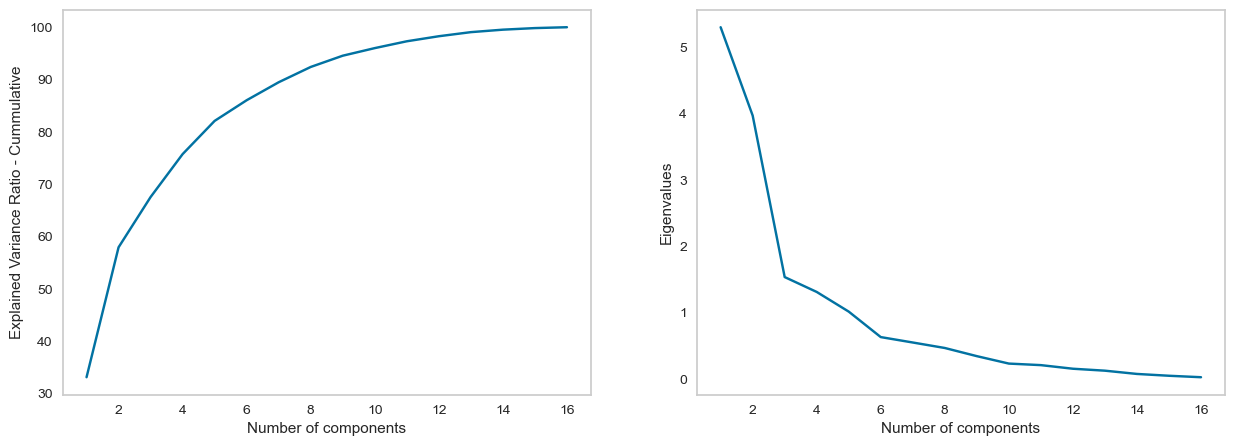

In [102]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 17), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 17), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues')

I use 0.80 cummulative, it means retain 80 % of the information from initial dataset. To retain 80 % of the information, the number of components is 5. I use threeshold 80%, due to better silhoutte score on clustering, and for me, 20 % loss of data is still in the tolerable ranged

In [103]:
# Check the number of features if we want to retain 80 % of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.80) + 1
num_features

5

Reduced from 16 features to 5 features

In [104]:
# Let's train the model with 80 % of the original dataset information

pca = PCA(n_components=0.80)
pca.fit(df_scaled)

df_scaled_pca = pca.transform(df_scaled)

Next proceed to Elbow method

---
---

<vspace>

### ***Elbow Method***

---

Elbow method is used to select correct number of cluster based on Within Cluster Sum of Squares (WCSS), it measures the total variance within each cluster.

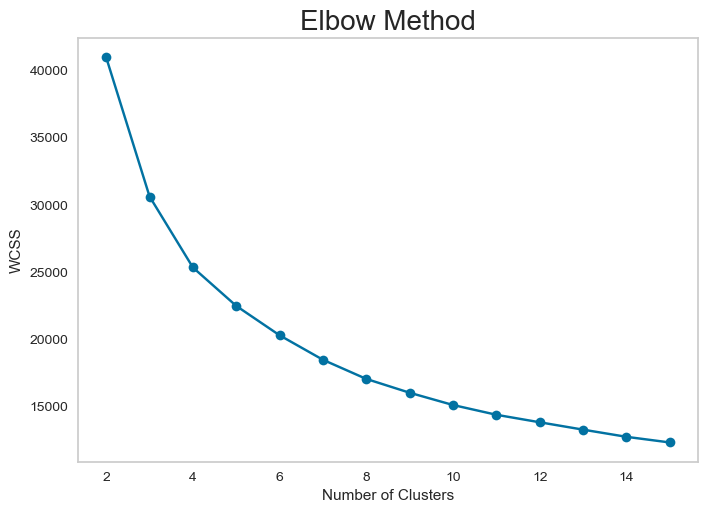

In [105]:
# Find the optimal number of clusters using Elbow Method
wcss = []
random_state = 1
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From Elbow method plot, you can tell that the optimal for number of clusters is 3 or 4 because the rate of decrease in WCSS starts to slow down. In addition to Elbow method, i create silhoutte plot to compared the optimal number of cluster from Elbow method to silhoutte plot

---
---

<vspace>

### ***Silhoutte Plot***

---

In [106]:
# Function to create Silhouette Plot

def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 1, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

Let's visualize silhoutte plot

For n_clusters = 2 The average silhouette_score is : 0.27752990211836975
For n_clusters = 3 The average silhouette_score is : 0.2920000853515422
For n_clusters = 4 The average silhouette_score is : 0.27459261712661515
For n_clusters = 5 The average silhouette_score is : 0.26634313813381194


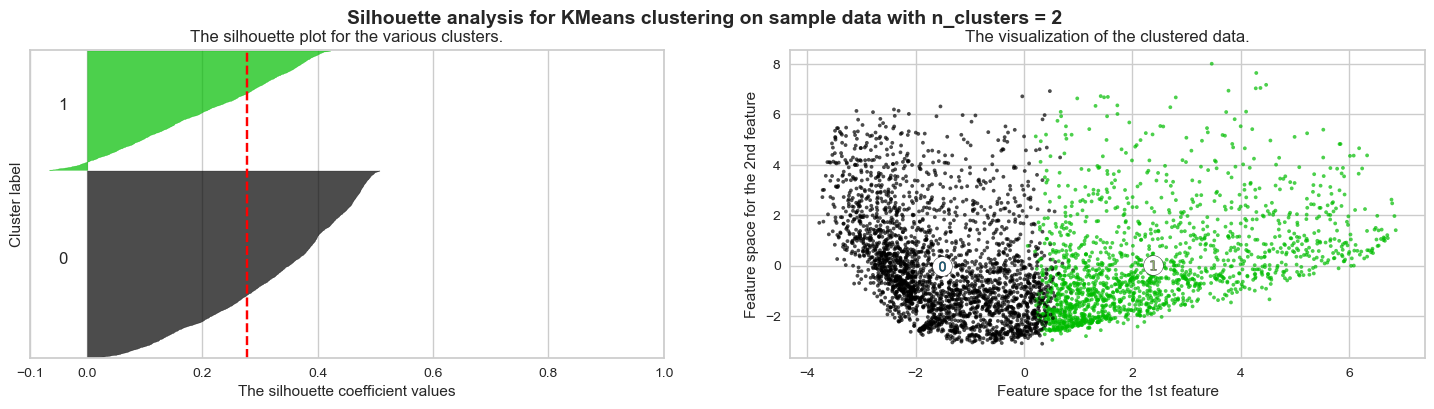

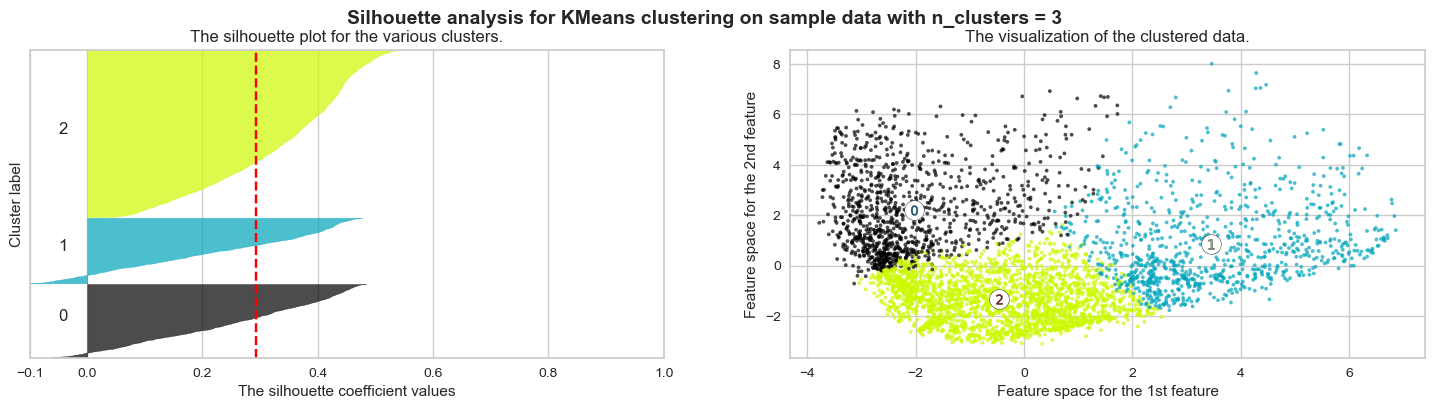

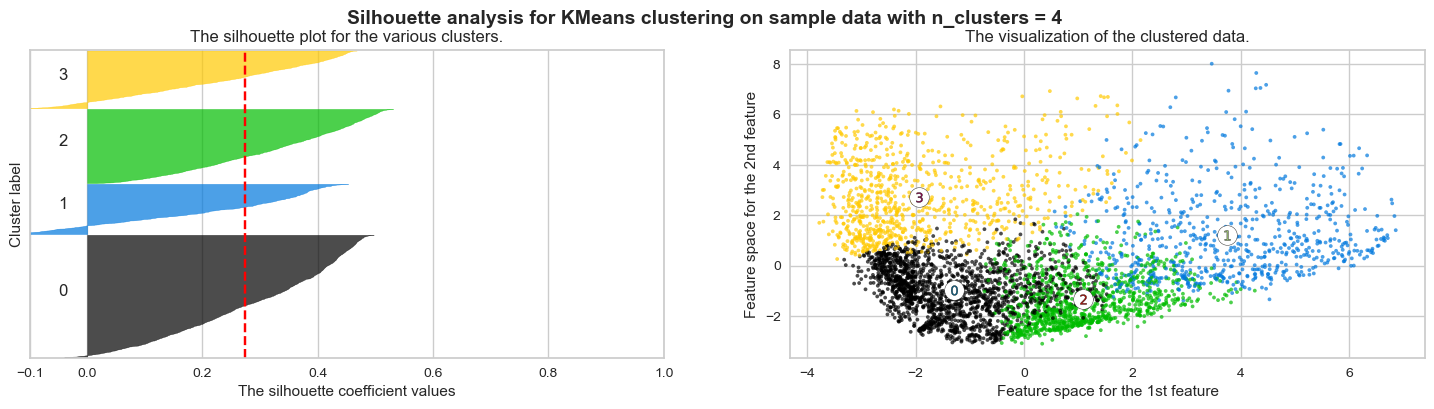

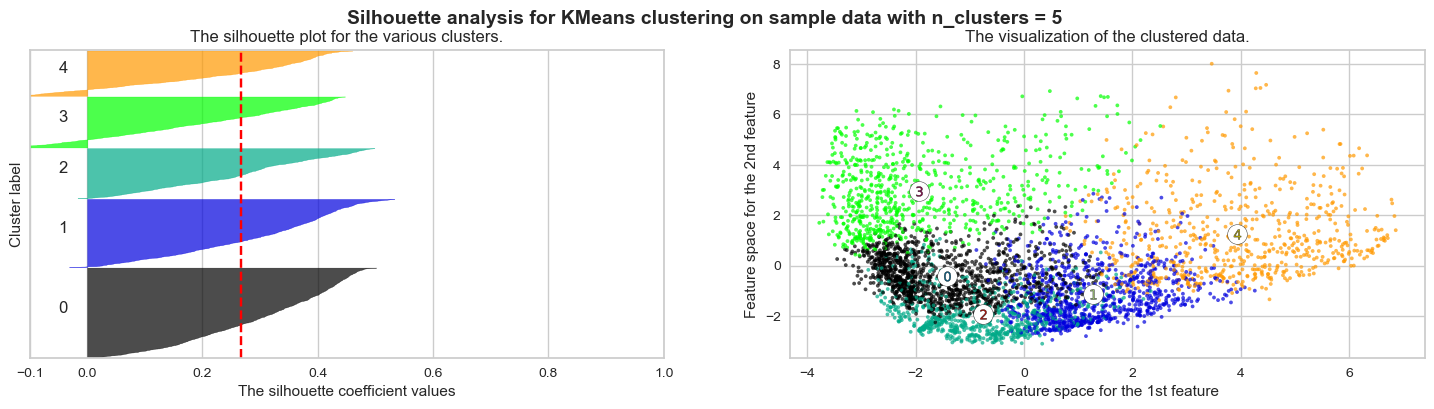

In [107]:
# Silhoutte plot for 2 cluster to 5 cluster
plot_silhouette(range(2, 6), df_scaled_pca, random_state)

From Silhoutte plot, all cluster have silhoutte score more than average silhoutte score. I also choose the wide fluctuation in the size of cluster. From elbow method, silhoutte score, and silhoutte plot, i choose 3 cluster as my best choice. Next train with optimal number of clusters using K-means

---
---

<vspace>

### ***Model Training and Predict***

---

In [108]:
# Train with optimal number of clusters
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
# Predict scaling pca
pred = km.fit_predict(df_scaled_pca)
pred

array([1, 1, 1, ..., 2, 2, 2])

In [109]:
# Insert clustering result into cluster data frame

df_cluster['cluster'] = pred
df_cluster

,BALANCE LEFT,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,1
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,1
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,1
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,1
4,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,2
4312,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,2
4313,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,2
4314,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,2


From data frame above, we can see the cluster of each data. Next let's visualized it in 2D

<Axes: >

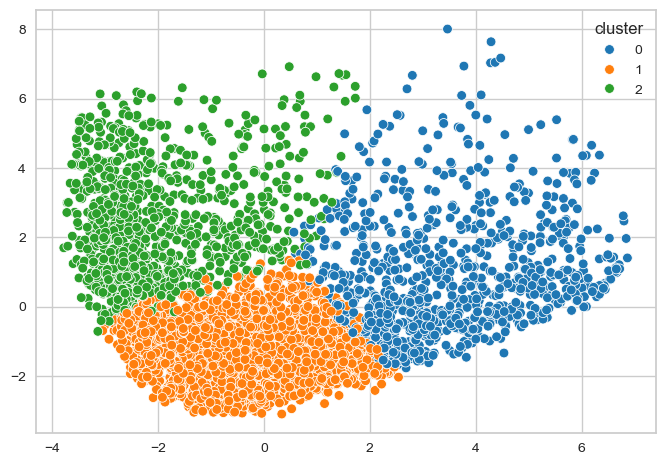

In [110]:
# Cluster visualization in 2D

pca_2d = PCA(n_components=2)
pca_2d.fit(df_scaled)

sales_scaled_pca_2d = pca_2d.fit_transform(df_scaled)

sns.scatterplot(x=sales_scaled_pca_2d[:,0], y=sales_scaled_pca_2d[:,1], hue=df_cluster['cluster'], palette='tab10')

From visualization, it can be seen that clustering is actually pretty okay, but we can see some data that overlapping with another data. Next proceed to EDA after clustering for labelling the cluster

---
---

<vspace>

### ***EDA After Clustering***

----

Now, i want to know which features that contributed the most for clustering

In [111]:
# Check correlation using phik clustering
df_cluster.phik_matrix()

interval columns not set, guessing: ['BALANCE LEFT', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'cluster']


,BALANCE LEFT,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
BALANCE LEFT,1.000000,0.255021,0.379264,0.303343,0.454761,0.513631,0.102121,0.172522,0.093084,0.445232,0.259534,0.363945,0.673813,0.482952,0.378037,0.309573,0.000000,0.541283
BALANCE_FREQUENCY,0.255021,1.000000,0.000000,0.000000,0.000000,0.000000,0.483352,0.195235,0.377636,0.169835,0.000000,0.077512,0.116260,0.107000,0.000000,0.348450,0.333647,0.322724
PURCHASES,0.379264,0.000000,1.000000,0.975863,0.794400,0.103513,0.141931,0.286993,0.116866,0.000000,0.000000,0.864599,0.449183,0.810612,0.151907,0.128609,0.000000,0.480892
ONEOFF_PURCHASES,0.303343,0.000000,0.975863,1.000000,0.667610,0.174733,0.094418,0.253989,0.046088,0.000000,0.107310,0.782167,0.411466,0.771858,0.068017,0.127551,0.000000,0.402580
INSTALLMENTS_PURCHASES,0.454761,0.000000,0.794400,0.667610,1.000000,0.000000,0.157102,0.184412,0.202468,0.000000,0.000000,0.702085,0.444761,0.551037,0.226784,0.125884,0.000000,0.341355
CASH_ADVANCE,0.513631,0.000000,0.103513,0.174733,0.000000,1.000000,0.179341,0.113934,0.154520,0.542550,0.539217,0.000000,0.408037,0.755689,0.206753,0.185110,0.074035,0.536938
PURCHASES_FREQUENCY,0.102121,0.483352,0.141931,0.094418,0.157102,0.179341,1.000000,0.815373,0.884504,0.390091,0.081823,0.341676,0.179721,0.094578,0.000000,0.337222,0.166544,0.613905
ONEOFF_PURCHASES_FREQUENCY,0.172522,0.195235,0.286993,0.253989,0.184412,0.113934,0.815373,1.000000,0.182739,0.141795,0.000000,0.392624,0.360787,0.214430,0.000000,0.212400,0.120632,0.616163
PURCHASES_INSTALLMENTS_FREQUENCY,0.093084,0.377636,0.116866,0.046088,0.202468,0.154520,0.884504,0.182739,1.000000,0.335683,0.057113,0.337673,0.128965,0.038692,0.000000,0.307042,0.215746,0.513656
CASH_ADVANCE_FREQUENCY,0.445232,0.169835,0.000000,0.000000,0.000000,0.542550,0.390091,0.141795,0.335683,1.000000,0.587099,0.042851,0.175573,0.200628,0.000000,0.283534,0.205172,0.668975


For phik matrix, 4 features that contributed the most to cluster is purchase transaction, cash advance frequency, one off purchases frequency, and purchases frequency, but because one off purchases frequency and purchases frequency characteristic same as purchase transaction, so i will not using these features. Then for the next feature i choose is balance left and credit limit.

In [112]:
# New data frame for eda purposes
df_cluster_eda = df_cluster[['PURCHASES_TRX','CASH_ADVANCE_TRX','BALANCE LEFT','CREDIT_LIMIT','cluster']]

I want to see the characteristic of each cluster using describe

In [113]:
# Describing cluster 0
df_cluster0 = df_cluster_eda[df_cluster_eda['cluster']==0]
df_cluster0.describe()

,PURCHASES_TRX,CASH_ADVANCE_TRX,BALANCE LEFT,CREDIT_LIMIT,cluster
count,927.000000,927.000000,927.000000,927.000000,927.0
mean,44.434736,1.564186,1981.104194,7014.759243,0.0
std,37.259289,4.563439,2412.081533,4293.008638,0.0
min,2.000000,0.000000,6.793588,300.000000,0.0
25%,22.000000,0.000000,329.377514,4000.000000,0.0
50%,33.000000,0.000000,1019.133646,6000.000000,0.0
75%,53.000000,1.000000,2813.670925,9500.000000,0.0
max,358.000000,62.000000,19043.138560,30000.000000,0.0


In [114]:
# Describing cluster 1
df_cluster1 = df_cluster_eda[df_cluster_eda['cluster']==1]
df_cluster1.describe()

,PURCHASES_TRX,CASH_ADVANCE_TRX,BALANCE LEFT,CREDIT_LIMIT,cluster
count,2360.000000,2360.000000,2360.000000,2360.000000,2360.0
mean,7.847881,0.848729,676.601096,3028.544256,1.0
std,8.889801,1.594421,808.652738,2549.366667,0.0
min,0.000000,0.000000,0.000000,150.000000,1.0
25%,1.000000,0.000000,48.461984,1200.000000,1.0
50%,6.000000,0.000000,306.908057,2000.000000,1.0
75%,12.000000,1.000000,1109.493774,4000.000000,1.0
max,186.000000,23.000000,5860.433624,20000.000000,1.0


In [115]:
# Describing cluster 2
df_cluster2 = df_cluster_eda[df_cluster_eda['cluster']==2]
df_cluster2.describe()

,PURCHASES_TRX,CASH_ADVANCE_TRX,BALANCE LEFT,CREDIT_LIMIT,cluster
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.0
mean,4.055394,10.286686,3374.958265,5711.758989,2.0
std,7.981852,9.570872,2580.152831,3669.015644,0.0
min,0.000000,0.000000,15.523256,500.000000,2.0
25%,0.000000,5.000000,1432.326731,3000.000000,2.0
50%,0.000000,8.000000,2696.052766,5000.000000,2.0
75%,5.000000,13.000000,4694.671605,8000.000000,2.0
max,111.000000,110.000000,16304.889250,19000.000000,2.0


From each cluster described, i will make EDA for see and visualize characteristic of each cluster

----
---

### ***1. Cluster Distribution***

In [116]:
cluster = df_cluster_eda.groupby(['cluster'])['cluster'].count()

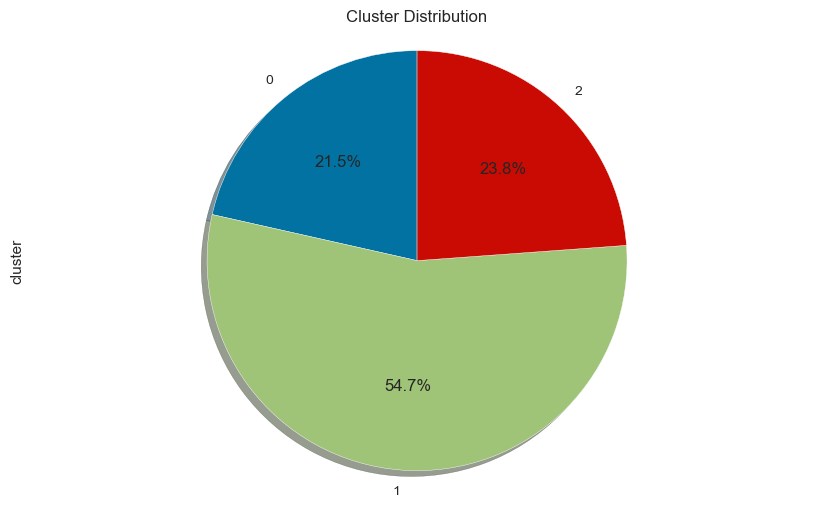

In [117]:
# autopct create %, start angle represent starting point
cluster.plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Cluster Distribution')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The pie chart above shows the distribution of each cluster. Cluster 1 has the highest proportion at 54.7%, followed by Cluster 2 at 23.8%, and finally Cluster 0 at 21.5%.

### ***2. Purchase Transaction Each Cluster***

---

Group by cluster and see average purchases transaction on each cluster

In [118]:
# Group to calculate average purchases transaction
Purchase = df_cluster_eda.groupby(['cluster'])['PURCHASES_TRX'].mean()

Let's visualize it

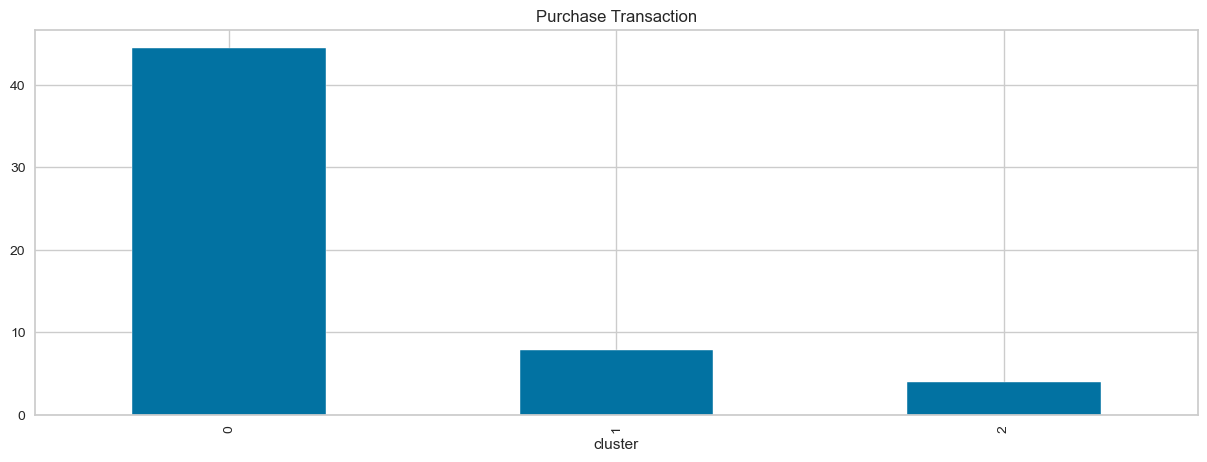

In [119]:
# Creating subplots with 1 row and 2 columns, not sharing the x-axis, and setting the figure size
plt.figure(figsize=(15,5))
Purchase.plot(kind = 'bar')
plt.title('Purchase Transaction')
# Show plot
plt.show()

The histogram above shows that the highest average purchase transactions occur in Cluster 0, with an average of 44 transactions. This is followed by Cluster 1 with 7 transactions, and Cluster 2 with 4 transactions. It means that cluster 0 have highest activity of purchases

### ***3. Cash Advance Transaction Each Cluster***

In [120]:
Cash = df_cluster_eda.groupby(['cluster'])['CASH_ADVANCE_TRX'].mean()

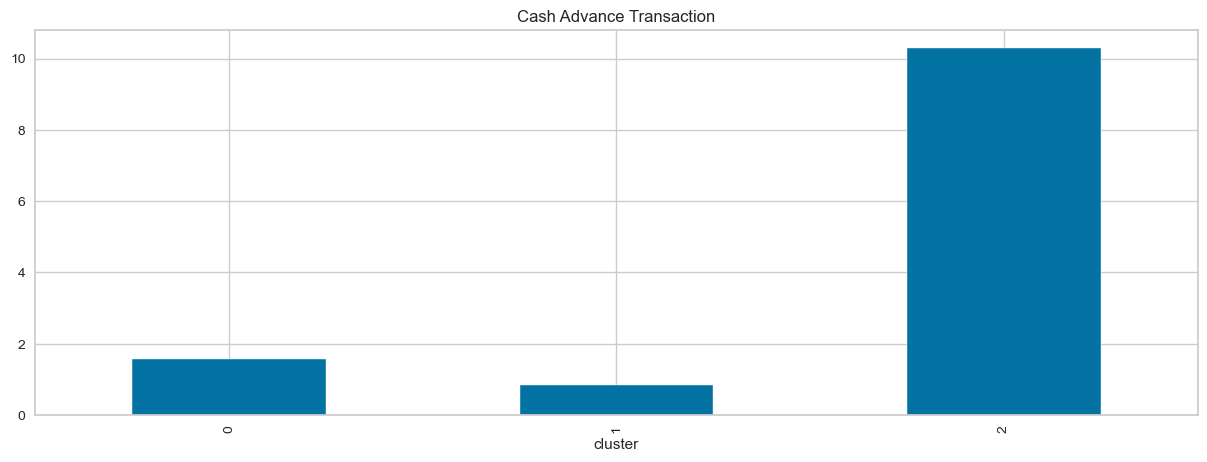

In [121]:
# Creating subplots with 1 row and 2 columns, not sharing the x-axis, and setting the figure size
plt.figure(figsize=(15,5))
Cash.plot(kind = 'bar')
plt.title('Cash Advance Transaction')
# Show plot
plt.show()

The histogram above shows that Cluster 2 has the highest average cash advance transactions, with an average of 10.2 transactions. This is followed by Cluster 0 with an average of 1.5 transactions, and Cluster 1 with an average of 0.8 transactions. It means that cluster 2 have highest activity of cash advance

### ***4. Balance Left Each Cluster***

In [122]:
Balance = df_cluster_eda.groupby(['cluster'])['BALANCE LEFT'].mean()

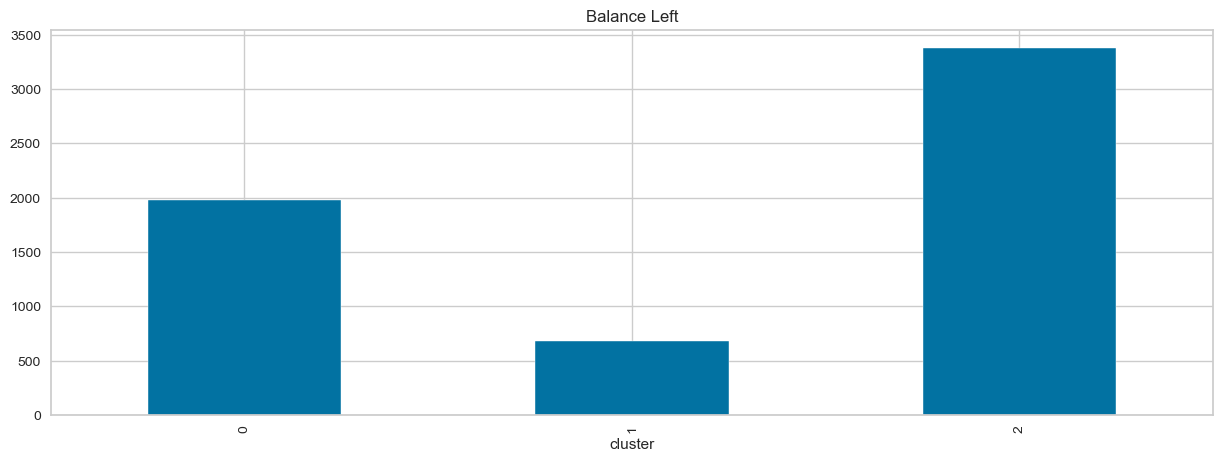

In [123]:
# Creating subplots with 1 row and 2 columns, not sharing the x-axis, and setting the figure size
plt.figure(figsize=(15,5))
Balance.plot(kind = 'bar')
plt.title('Balance Left')
# Show plot
plt.show()

The histogram above shows that Cluster 2 has the highest average balance left, with an average of 3,374. This is followed by Cluster 0 with an average balance of 1,981, and Cluster 1 with an average balance of 676. This indicates that Cluster 2, despite having the lowest amount in purchase transactions, corresponds to the highest balance left.

### ***5. Credit Limit Each Cluster***

In [124]:
Limit = df_cluster_eda.groupby(['cluster'])['CREDIT_LIMIT'].mean()

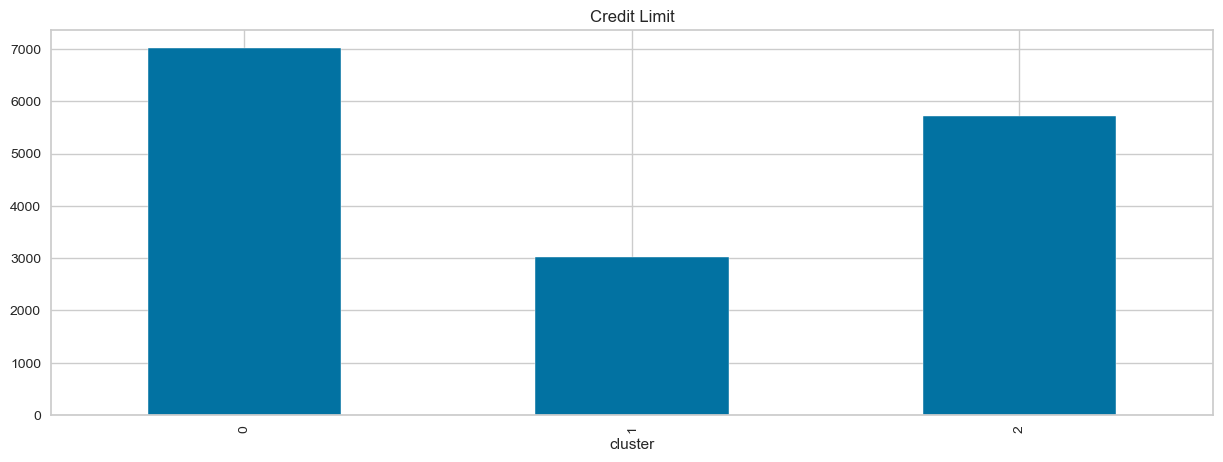

In [125]:
# Creating subplots with 1 row and 2 columns, not sharing the x-axis, and setting the figure size
plt.figure(figsize=(15,5))
Limit.plot(kind = 'bar')
plt.title('Credit Limit')
# Show plot
plt.show()

The histogram above shows that Cluster 0 has the highest average credit limit, with an average of 7,014. This is followed by Cluster 2 with an average credit limit of 5,711, and Cluster 1 with an average credit limit of 3,028. 

Proceed to EDA analysis

---

### ***EDA Analysis***

---

From the exploratory data analysis (EDA) after clustering, I can conclude the following:

- **Cluster 0:** This group consists of credit card customers with high purchase transactions, small cash advances, moderate remaining balances, and high credit limits. Based on these characteristics, I refer to this cluster as "Heavy Spenders."

- **Cluster 1:** This cluster includes credit card customers with low purchase transactions, low cash advances, low remaining balances, and low credit limits. Based on these characteristics, I refer to this cluster as "Low Spenders."

- **Cluster 2:** This group is characterized by credit card customers with low purchase transactions, high cash advances, high remaining balances, and moderate credit limits. Based on these characteristics, I refer to this cluster as "Cash Advance Heavy Users."

---

After labeling the clusters, I will change the cluster names to the labels that i already noted.

In [126]:
# Replace cluster with label 
df_cluster["cluster"] = df_cluster["cluster"].replace(0, "Heavy Spenders")
df_cluster["cluster"] = df_cluster["cluster"].replace(1, "Low Spenders")
df_cluster["cluster"] = df_cluster["cluster"].replace(2, "Cash Advance Heavy Users")

In [127]:
df_cluster

,BALANCE LEFT,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8,Low Spenders
1,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8,Low Spenders
2,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8,Low Spenders
3,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8,Low Spenders
4,424.994385,0.375000,1200.00,1200.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1200.0,57.266292,56.720210,0.000000,8,Low Spenders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4311,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11,Cash Advance Heavy Users
4312,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11,Cash Advance Heavy Users
4313,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11,Cash Advance Heavy Users
4314,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11,Cash Advance Heavy Users


---

<vspace>

### ***Summary***

---

In this unsupervised clustering project, I applied dimensionality reduction using the PCA method followed by K-Means clustering. I identified three clusters and, upon further analysis, labeled them based on customer behavior and spending patterns on credit cards. Cluster 0 represents customers who are "Heavy Spenders," Cluster 1 represents customers who are "Low Spenders," and Cluster 2 represents customers who are "Cash Advance Heavy Users."

---

<vspace>

### ***Recommendation***

---

From the bank's perspective, to increase bank revenue, heavy spending customers can explore the cash advances offered by the bank. Low spending customers can increase credit card usage and raise their credit limit by building a good credit history. Heavy users of cash advances can consider using their credit card for purchasing and increasing their credit card usage

---

<vspace>

### ***Conceptual Problems***

---

### ***1. What is meant by inertia in the K-Means algorithm?***

Inertia is calculated distance between data point to centroid. It can see how well the data set clustered by K-Means. Model with big inertia, means that the distance between data point to centroid is big, vice versa. So the lower the better

### ***2. Explain what is meant by Elbow Method***

Elbow method is used to select correct number of cluster based on Within Cluster Sum of Squares (WCSS), it measures the total variance within each cluster. To used Elbow method, first, plot the WCSS and then look for an elbow point on the plot where the rate of decrease in WCSS starts to slow down. This point indicates a potential optimal K.   
**Strength**    : Easy to use and interpret      
**Weakness**    : Choice of K-Values  is subjective, because hard to pin point the right K-Values

---

<vspace>

### ***Data Inference***

---

Save the model

In [128]:
#Save the files
with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('PCA.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)

with open('K-means.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)

---
---